# LHII Analysis

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

import mdtraj
import itertools

import matplotlib
font = {'size'   : 22}

import analysis

matplotlib.rc('font', **font)

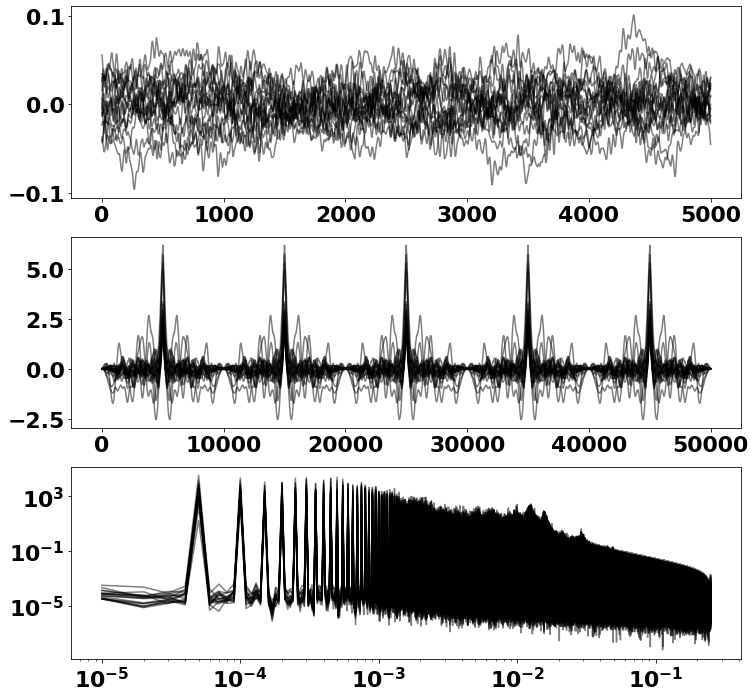

In [9]:
def first_half(arr):
    return arr[1:len(arr)//2]

length = 10*1e3 #femtoseconds
dt = 2 #femtoseconds

run = f"{int(length/1e3)}ps_{dt}fs"

Mg_d = np.load(f"{run}_LHII_distances.npy")

avg_d = np.mean(Mg_d, axis=0)

closest_neighbours = np.where(avg_d < 1.5)[0]

fig, ax = plt.subplots(3,1)

for n, color in zip([5], ['red', 'blue', 'green']):
    for i in closest_neighbours:
        x = Mg_d[:,i] - np.mean(Mg_d[:,i])

        autocorr = first_half(analysis.autocorr(x))
        
        autocorr = np.concatenate((autocorr, autocorr[::-1]))

        repeated = np.tile(autocorr, n)

        spectrum = scipy.fft.fft(repeated)

        spectrum_normal_domain = np.fft.fftfreq(len(autocorr) * n, dt) 

        hilbert = scipy.signal.hilbert(np.real(spectrum))
        
        ax[0].plot(x, alpha=0.5, color='black')
        ax[1].plot(repeated, alpha=0.5, color='black')
        ax[2].plot(first_half(spectrum_normal_domain), abs(first_half(spectrum)), alpha=0.5, color='black')
        #ax[2].plot(first_half(spectrum_normal_domain), abs(first_half(np.abs(hilbert))), alpha=0.5, color='red')

ax[2].set_xscale('log')
ax[2].set_yscale('log')
    
fig.set_size_inches(12,12)

(array([  1,  25,  51,  76, 120, 142, 180, 199, 231, 247, 273, 286, 306,
       316, 330, 337, 345, 349]),)


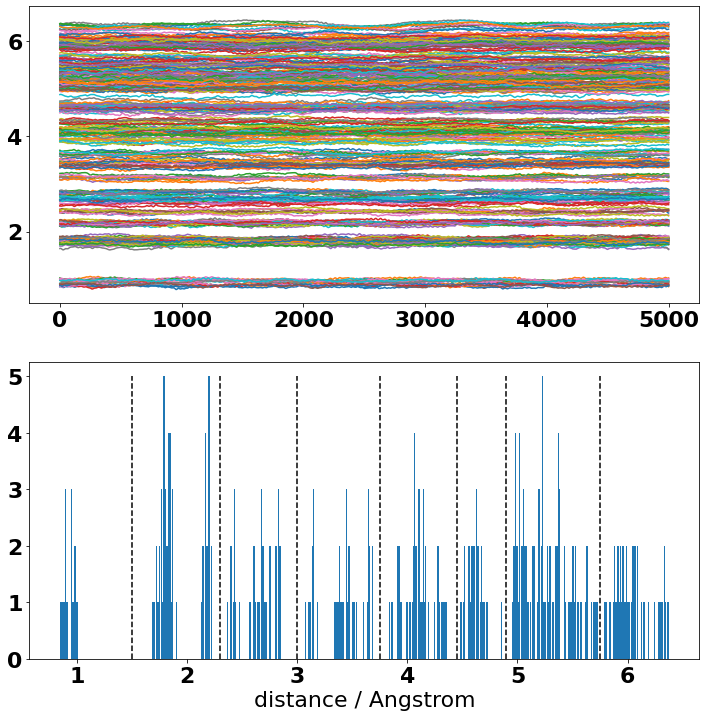

In [131]:
length = 10*1e3 #femtoseconds
dt = 2 #femtoseconds

run = f"{int(length/1e3)}ps_{dt}fs"

Mg_d = np.load(f"{run}_LHII_distances.npy")

Mg_d.shape

fig, ax = plt.subplots(2, 1, figsize=(12,12))

ax[0].plot(Mg_d);
ax[1].hist(np.average(Mg_d, axis=0), bins=500);

ax[1].vlines([1.5, 2.3, 3, 3.75, 4.45, 4.9, 5.75], color='black', ymin=0, ymax=5, linestyle="--")

ax[1].set_xlabel("distance / Angstrom")

print(np.where(np.average(Mg_d, axis=0) < 1.5))

In [35]:
spectra_1000ps, domain_1000ps = np.load('1000ps_100fs_LHII_spectra.npy'), np.load('1000ps_100fs_LHII_domain.npy')
spectra_100ps, domain_100ps = np.load('100ps_10fs_LHII_spectra.npy'), np.load('100ps_10fs_LHII_domain.npy')
spectra_10ps, domain_10ps = np.load('10ps_2fs_LHII_spectra.npy'), np.load('10ps_2fs_LHII_domain.npy')

In [36]:
spectra_100ps.shape

(351, 99995)

In [49]:
def value_select(upper, lower):
    select = np.where((np.average(Mg_d, axis=0) < upper) & (np.average(Mg_d, axis=0) > lower))
    
    return select[0]

distances = value_select(1.5, 0)

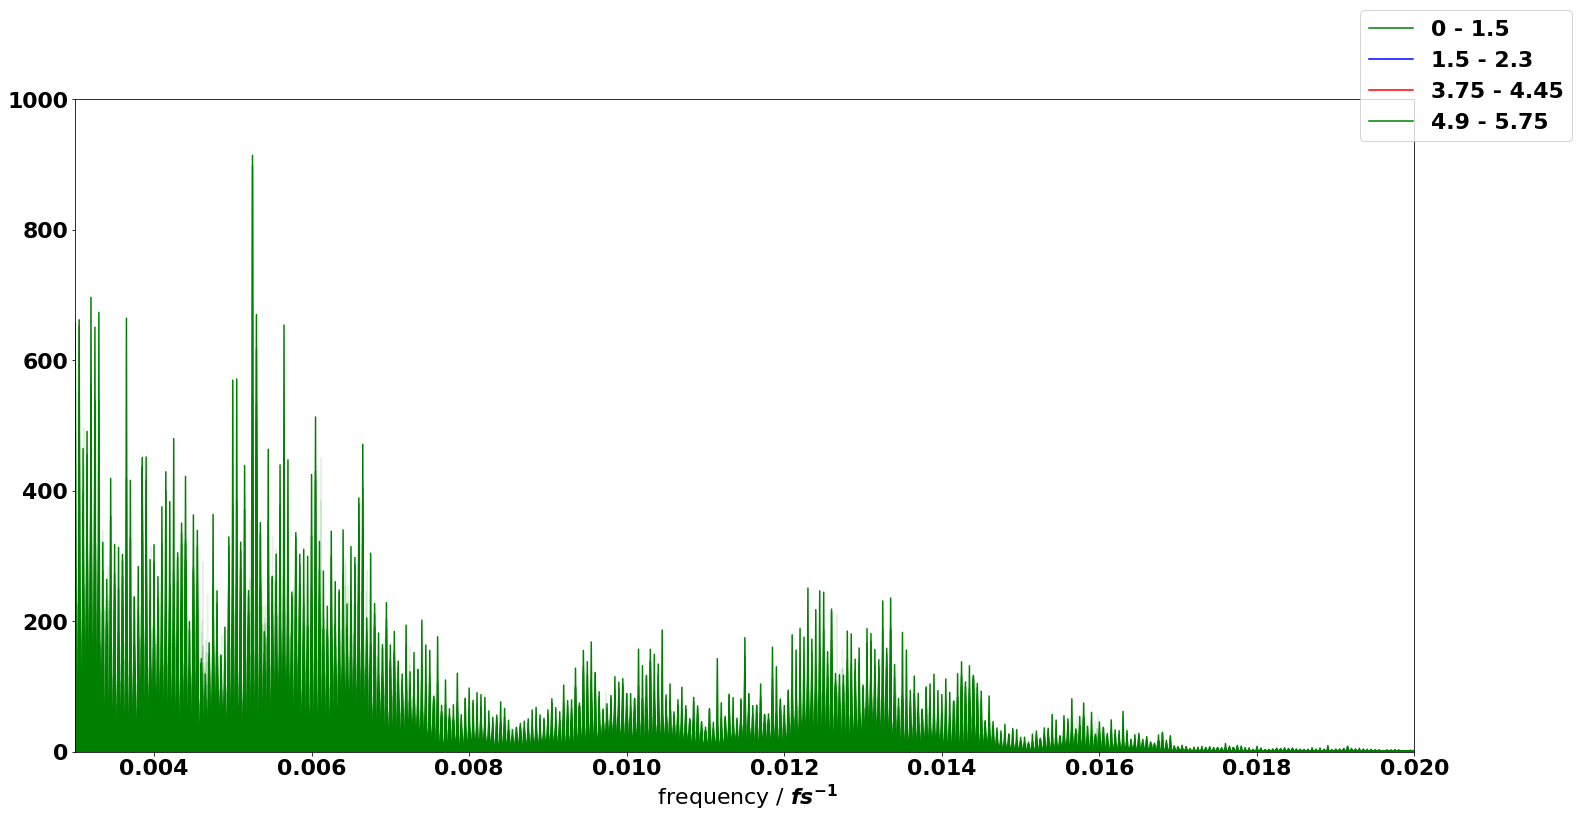

In [142]:
fig, ax = plt.subplots(1,1, sharex=True, sharey=True)

ax.set_xlim(3e-3, 2e-2)
ax.set_ylim(0, 1000)

[1.5, 2.3, 3, 3.75, 4.45, 4.9, 5.75]

for i in value_select(5.75, 4.9):
    lin1, = ax.plot(first_half(domain_10ps), first_half(abs(spectra_10ps[i])), alpha=1, color='green')
    ax.plot(first_half(domain_100ps), first_half(abs(spectra_100ps[i])), alpha=0.1, color='green')

#for i in value_select(4.45, 3.75):
#    lin2, = ax.plot(first_half(domain_10ps), first_half(abs(spectra_10ps[i])), alpha=1, color='blue')
#    ax.plot(first_half(domain_100ps), first_half(abs(spectra_100ps[i])), alpha=0.1, color='blue')

#for i in value_select(2.3, 1.5):
#    lin3, = ax.plot(first_half(domain_10ps), first_half(abs(spectra_10ps[i])), alpha=1, color='red')
#    ax.plot(first_half(domain_100ps), first_half(abs(spectra_100ps[i])), alpha=0.1, color='red')
    
#for i in value_select(1.5, 0.0):
#    lin4, = ax.plot(first_half(domain_10ps), first_half(abs(spectra_10ps[i])), alpha=1, color='black')
#    ax.plot(first_half(domain_100ps), first_half(abs(spectra_100ps[i])), alpha=0.1, color='black')
    
fig.legend([lin4, lin3, lin2, lin1], ["0 - 1.5", "1.5 - 2.3", "3.75 - 4.45", "4.9 - 5.75"])

ax.set_xlabel(" frequency / $fs^{-1}$")

fig.set_size_inches(24, 12)


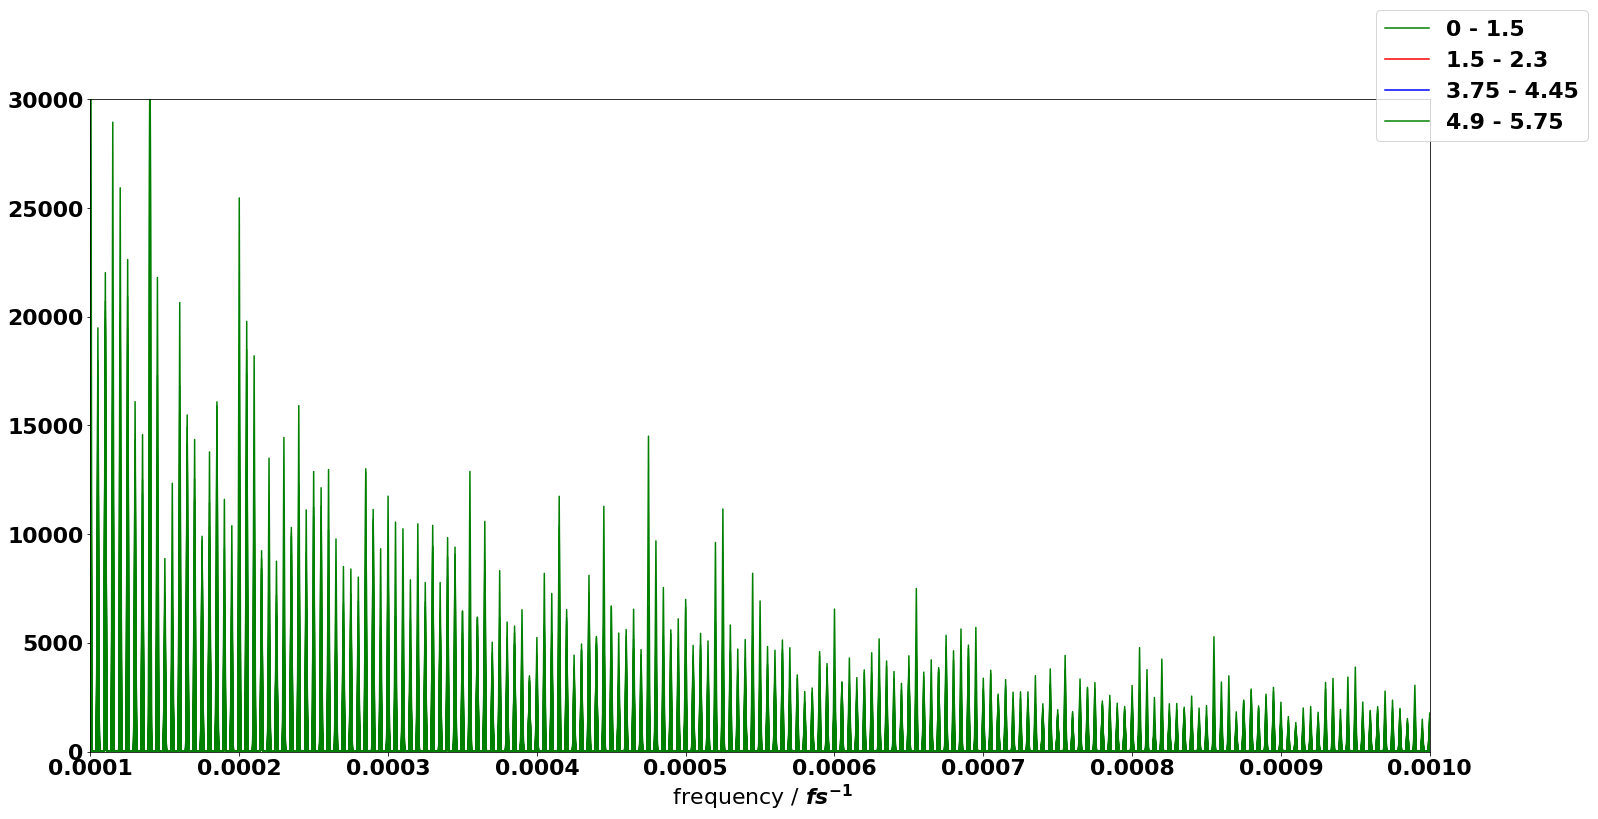

In [143]:
fig, ax = plt.subplots(1,1, sharex=True, sharey=True)

ax.set_xlim(1e-4, 1e-3)
ax.set_ylim(0, 30000)

[1.5, 2.3, 3, 3.75, 4.45, 4.9, 5.75]

for i in value_select(5.75, 4.9):
    lin4, = ax.plot(first_half(domain_100ps), first_half(abs(spectra_100ps[i])), alpha=1, color='green')

#for i in value_select(4.45, 3.75):
#    lin3, = ax.plot(first_half(domain_100ps), first_half(abs(spectra_100ps[i])), alpha=1, color='blue')

#for i in value_select(2.3, 1.5):
#    lin2, = ax.plot(first_half(domain_100ps), first_half(abs(spectra_100ps[i])), alpha=1, color='red')
    
#for i in value_select(1.5, 0.0):
#    lin1, = ax.plot(first_half(domain_100ps), first_half(abs(spectra_100ps[i])), alpha=1, color='black')

fig.legend([lin1, lin2, lin3, lin4], ["0 - 1.5", "1.5 - 2.3", "3.75 - 4.45", "4.9 - 5.75"])

ax.set_xlabel(" frequency / $fs^{-1}$")

fig.set_size_inches(24, 12)


 MD length : 0.10 ns, timesteps :   1 fs, highest period : 200 ps, lowest period : 2.0 fs
 MD length : 0.10 ns, timesteps :  20 fs, highest period : 200 ps, lowest period : 40.0 fs
 MD length : 0.10 ns, timesteps :  50 fs, highest period : 200 ps, lowest period : 100.0 fs
 MD length : 0.10 ns, timesteps :  100 fs, highest period : 200 ps, lowest period : 200.0 fs
 MD length : 0.10 ns, timesteps :  200 fs, highest period : 200 ps, lowest period : 400.0 fs
 MD length : 0.10 ns, timesteps :  500 fs, highest period : 199 ps, lowest period : 1000.0 fs
 MD length : 0.10 ns, timesteps :  1000 fs, highest period : 198 ps, lowest period : 2000.0 fs
 MD length : 1.00 ns, timesteps :   1 fs, highest period : 2000 ps, lowest period : 2.0 fs
 MD length : 1.00 ns, timesteps :  20 fs, highest period : 2000 ps, lowest period : 40.0 fs
 MD length : 1.00 ns, timesteps :  50 fs, highest period : 2000 ps, lowest period : 100.0 fs
 MD length : 1.00 ns, timesteps :  100 fs, highest period : 2000 ps, lowest 

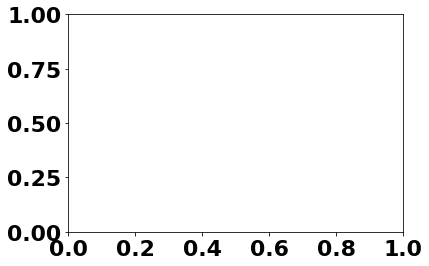

In [135]:
def resolution(length, timestep, cutoff=0):
    autocorr_length = 2 * (length - cutoff) - 2
        
    resolution = 1 / (timestep * autocorr_length)
    
    return resolution


def highest_frequency(timestep):
    return 1/(2*timestep)


fig, ax = plt.subplots()

MD_ns_lengths = [0.1, 1, 10, 100] # ns

timesteps = [1, 20, 50, 100, 200, 500, 1000] # fsbf

max_freqs = [highest_frequency(x) for x in timesteps]

res_mat = np.zeros((len(MD_ns_lengths), len(timesteps)))

for i, ns in enumerate(MD_ns_lengths):
    for j, dt in enumerate(timesteps):

        n_steps = 1e6 * ns / dt

        res, max_freq = resolution(n_steps, dt), highest_frequency(dt)
        
        print(f" MD length : {ns:2.2f} ns, timesteps : {dt : 3.0f} fs, highest period : {1e-3/res:3.0f} ps, lowest period : {1/max_freq} fs") 

In [ ]:
full_rmsd = mdtraj.rmsd(traj, traj, 0)
BCL_rmsd = mdtraj.rmsd(traj, traj, 0, atom_indices = BCL_atom_indices)

In [16]:
log = pd.read_csv("LH2_files/output/log.txt", sep="\t")
log["RMSD"] = full_rmsd
log["BCL RMSD"] = BCL_rmsd

ValueError: Length of values (2624) does not match length of index (4000)

In [13]:
log

,"#""Progress (%)""",Step,Potential Energy (kJ/mole),Temperature (K),Speed (ns/day)
0,0.0%,10,-2.868276e+06,300.578177,0.000
1,0.1%,20,-2.867977e+06,300.712337,0.483
2,0.1%,30,-2.868144e+06,300.805135,0.431
3,0.1%,40,-2.868425e+06,300.676495,0.444
4,0.1%,50,-2.868008e+06,300.446538,0.443
...,...,...,...,...,...
3995,99.9%,39960,-2.869814e+06,300.520701,0.448
3996,99.9%,39970,-2.870865e+06,300.675209,0.448
3997,100.0%,39980,-2.868822e+06,299.869208,0.448
3998,100.0%,39990,-2.868310e+06,299.991418,0.448


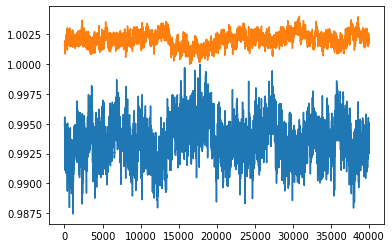

In [14]:
fig, ax = plt.subplots()

ax.plot(log.Step, log["Temperature (K)"]/max(log["Temperature (K)"]))
ax.plot(log.Step, log["Potential Energy (kJ/mole)"]/max(log["Potential Energy (kJ/mole)"]))

KeyError: 'RMSD'

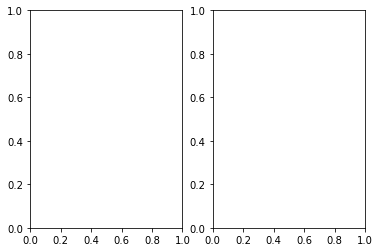

In [15]:
fig, ax = plt.subplots(1, 2)

log.plot("Step", "RMSD", ax=ax[0])
log.plot("Step", "BCL RMSD", ax=ax[1])

fig.set_size_inches(24, 12)